<a href="https://colab.research.google.com/github/RanaRoc/gymAnalysis/blob/main/Projet_prediction_elec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet prédiction prix de l'électricité







In [ ]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (15, 8)
sns.set()
sns.set(font_scale=1.5)

# Display up to 80 columns to keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

%matplotlib inline

In [ ]:
# Load data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('X_train_elec.csv')


# Visualisation des données
df.head()

Saving X_train_elec.csv to X_train_elec.csv


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN


In [ ]:

from google.colab import files
uploaded = files.upload()


y_train = pd.read_csv('y_train_elec.csv')


# Visualisation des données
y_train.head()

Saving y_train_elec.csv to y_train_elec.csv


,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907


In [ ]:



from google.colab import files
uploaded = files.upload()
df2 = pd.read_csv('X_test_elec.csv')


# Visualisation des données
df2.head()

Saving X_test_elec.csv to X_test_elec.csv


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN


In [ ]:


from google.colab import files
uploaded = files.upload()
df3 = pd.read_csv('y_random_elec.csv')


# Visualisation des données
df3.head()

Saving y_random_elec.csv to y_random_elec.csv


,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN


In [ ]:
df.shape

(10605, 10)

In [ ]:
df2.shape

(4942, 10)

In [ ]:

df.isnull().sum()

,0
DELIVERY_START,0
load_forecast,1287
coal_power_available,1
gas_power_available,1
nucelear_power_available,1
wind_power_forecasts_average,24
solar_power_forecasts_average,24
wind_power_forecasts_std,24
solar_power_forecasts_std,24
predicted_spot_price,8759


In [ ]:
X_train=df.drop('load_forecast',axis=1)
X_train=X_train.drop('predicted_spot_price',axis=1)
X_train.head()
X_train=X_train.dropna(axis=0)
X_train.isnull().sum()

,0
DELIVERY_START,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,0
wind_power_forecasts_std,0
solar_power_forecasts_std,0


In [ ]:
X_test=df2.drop('predicted_spot_price',axis=1)
X_test.head()
X_test=X_test.dropna(axis=0)
X_test.isnull().sum()

,0
DELIVERY_START,0
load_forecast,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,0
wind_power_forecasts_std,0
solar_power_forecasts_std,0


In [ ]:
y_train.isnull().sum()

,0
DELIVERY_START,0
spot_id_delta,0


In [ ]:
df2.isnull().sum()

,0
DELIVERY_START,0
load_forecast,0
coal_power_available,0
gas_power_available,0
nucelear_power_available,0
wind_power_forecasts_average,0
solar_power_forecasts_average,24
wind_power_forecasts_std,0
solar_power_forecasts_std,24
predicted_spot_price,1536


In [ ]:
# Vérification des doublons
print(X_train.duplicated().sum())




0


In [ ]:
# Vérification des doublons
print(X_test.duplicated().sum())




In [ ]:


# Convertir DELIVERY_START en datetime
X_train['DELIVERY_START'] = pd.to_datetime(X_train['DELIVERY_START'], utc=True)
X_test['DELIVERY_START'] = pd.to_datetime(X_test['DELIVERY_START'], utc=True)

# Extraire des caractéristiques temporelles
X_train['DELIVERY_HOUR'] = X_train['DELIVERY_START'].dt.hour
X_train['DELIVERY_DAY'] = X_train['DELIVERY_START'].dt.day
X_train['DELIVERY_MONTH'] = X_train['DELIVERY_START'].dt.month

X_test['DELIVERY_HOUR'] = X_test['DELIVERY_START'].dt.hour
X_test['DELIVERY_DAY'] = X_test['DELIVERY_START'].dt.day
X_test['DELIVERY_MONTH'] = X_test['DELIVERY_START'].dt.month

# Supprimer la colonne d'origine
X_train.drop(columns=['DELIVERY_START'], inplace=True)
X_test.drop(columns=['DELIVERY_START'], inplace=True)


In [ ]:
import pandas as pd
import numpy as np

# Assurez-vous que DELIVERY_START est bien au format datetime
y_train['DELIVERY_START'] = pd.to_datetime(y_train['DELIVERY_START'], utc=True)

# Extraire des caractéristiques temporelles
y_train['DELIVERY_HOUR'] = y_train['DELIVERY_START'].dt.hour           # Heure de la journée (0-23)
y_train['DELIVERY_DAYOFWEEK'] = y_train['DELIVERY_START'].dt.dayofweek # Jour de la semaine (0=lundi, 6=dimanche)
y_train['DELIVERY_MONTH'] = y_train['DELIVERY_START'].dt.month         # Mois (1-12)

# Supprimer la colonne originale DELIVERY_START si elle n'est plus nécessaire
y_train = y_train.drop(columns=['DELIVERY_START'])

# Vérifier le résultat
print(y_train.head())


   spot_id_delta  DELIVERY_HOUR  DELIVERY_DAYOFWEEK  DELIVERY_MONTH
0     -36.874770              1                   5               1
1     -12.643588              2                   5               1
2      -1.950193              3                   5               1
3       1.938272              4                   5               1
4       0.199907              5                   5               1


In [ ]:
y_train.shape

(10605, 4)

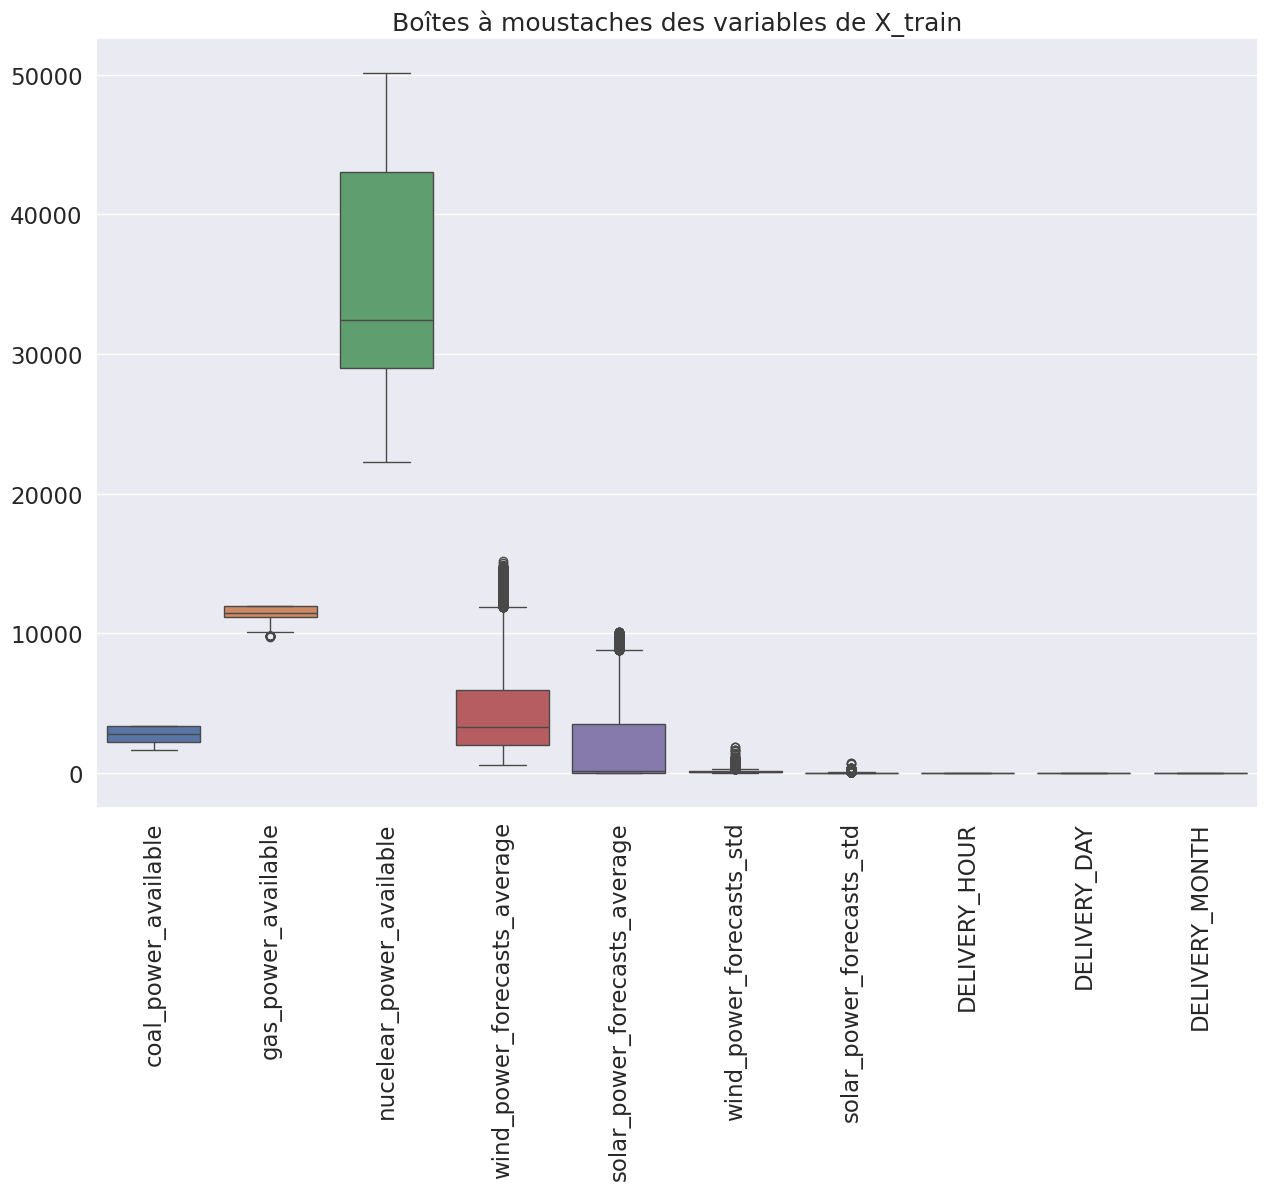

In [ ]:



# Afficher toutes les boîtes à moustaches
plt.figure(figsize=(15,10))  # Ajuster la taille de la figure si besoin
sns.boxplot(data=X_train)
plt.xticks(rotation=90)  # Tourner les labels des colonnes si besoin
plt.title("Boîtes à moustaches des variables de X_train")
plt.show()


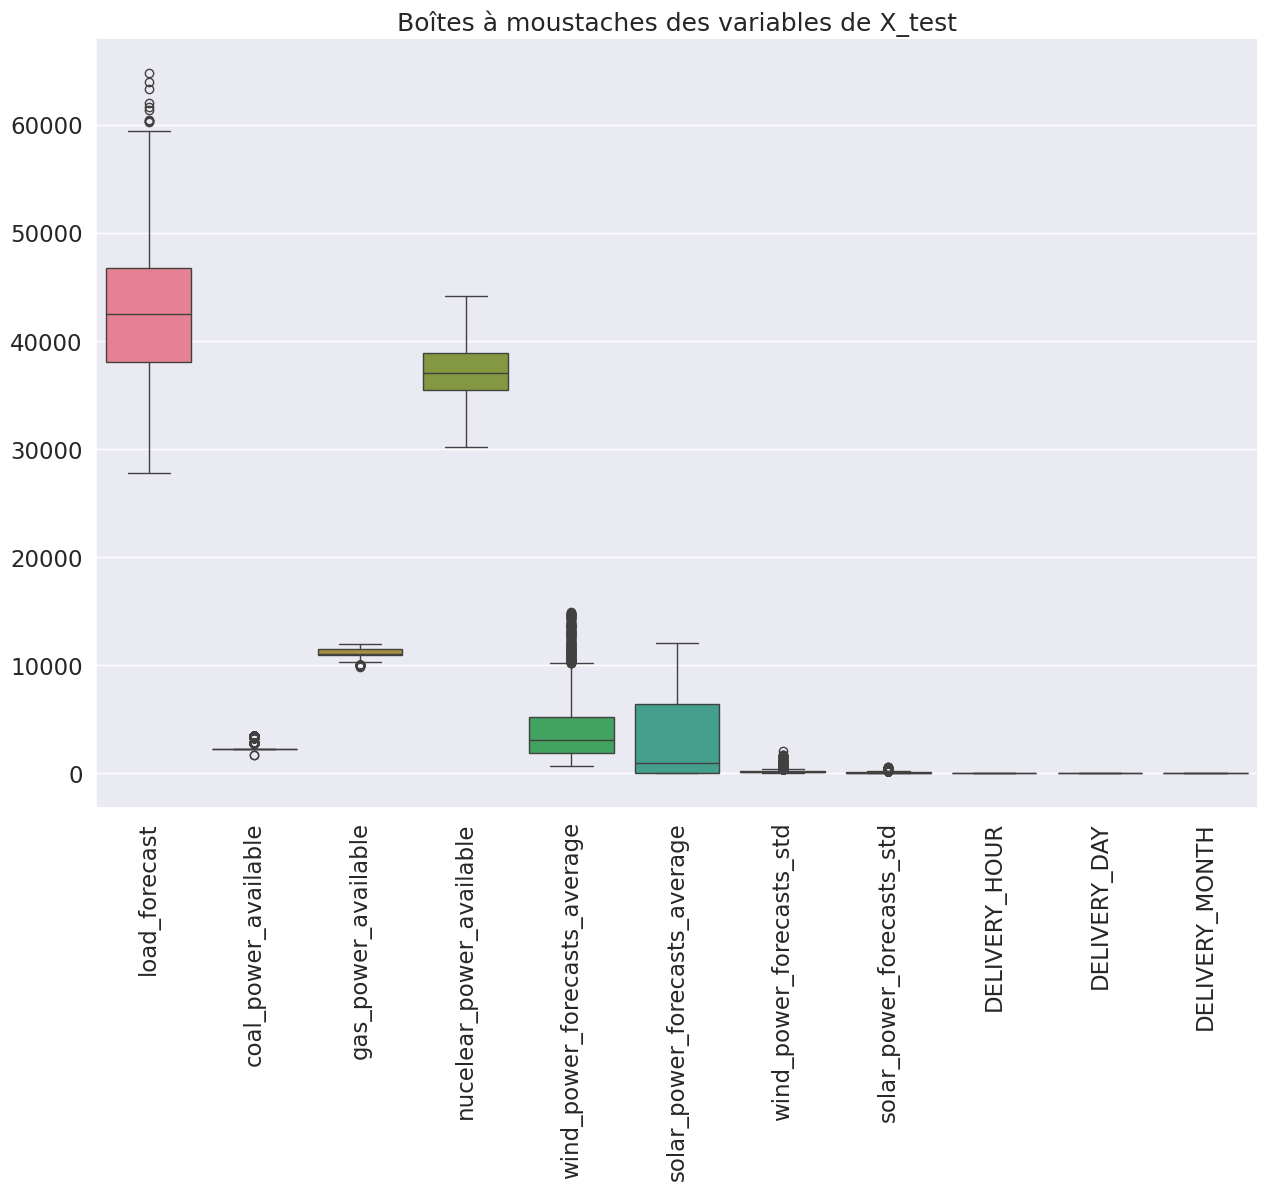

In [ ]:



# Afficher toutes les boîtes à moustaches
plt.figure(figsize=(15,10))  # Ajuster la taille de la figure si besoin
sns.boxplot(data=X_test)
plt.xticks(rotation=90)  # Tourner les labels des colonnes si besoin
plt.title("Boîtes à moustaches des variables de X_test")
plt.show()


In [ ]:

print(X_train.dtypes)

coal_power_available             float64
gas_power_available              float64
nucelear_power_available         float64
wind_power_forecasts_average     float64
solar_power_forecasts_average    float64
wind_power_forecasts_std         float64
solar_power_forecasts_std        float64
DELIVERY_HOUR                      int32
DELIVERY_DAY                       int32
DELIVERY_MONTH                     int32
dtype: object


In [ ]:
print(X_test.dtypes)

load_forecast                    float64
coal_power_available             float64
gas_power_available              float64
nucelear_power_available         float64
wind_power_forecasts_average     float64
solar_power_forecasts_average    float64
wind_power_forecasts_std         float64
solar_power_forecasts_std        float64
DELIVERY_HOUR                      int32
DELIVERY_DAY                       int32
DELIVERY_MONTH                     int32
dtype: object


In [ ]:
print(y_train.dtypes)

spot_id_delta         float64
DELIVERY_HOUR           int32
DELIVERY_DAYOFWEEK      int32
DELIVERY_MONTH          int32
dtype: object


array([[<Axes: title={'center': 'coal_power_available'}>,
        <Axes: title={'center': 'gas_power_available'}>,
        <Axes: title={'center': 'nucelear_power_available'}>],
       [<Axes: title={'center': 'wind_power_forecasts_average'}>,
        <Axes: title={'center': 'solar_power_forecasts_average'}>,
        <Axes: title={'center': 'wind_power_forecasts_std'}>],
       [<Axes: title={'center': 'solar_power_forecasts_std'}>,
        <Axes: title={'center': 'DELIVERY_HOUR'}>,
        <Axes: title={'center': 'DELIVERY_DAY'}>],
       [<Axes: title={'center': 'DELIVERY_MONTH'}>, <Axes: >, <Axes: >]],
      dtype=object)

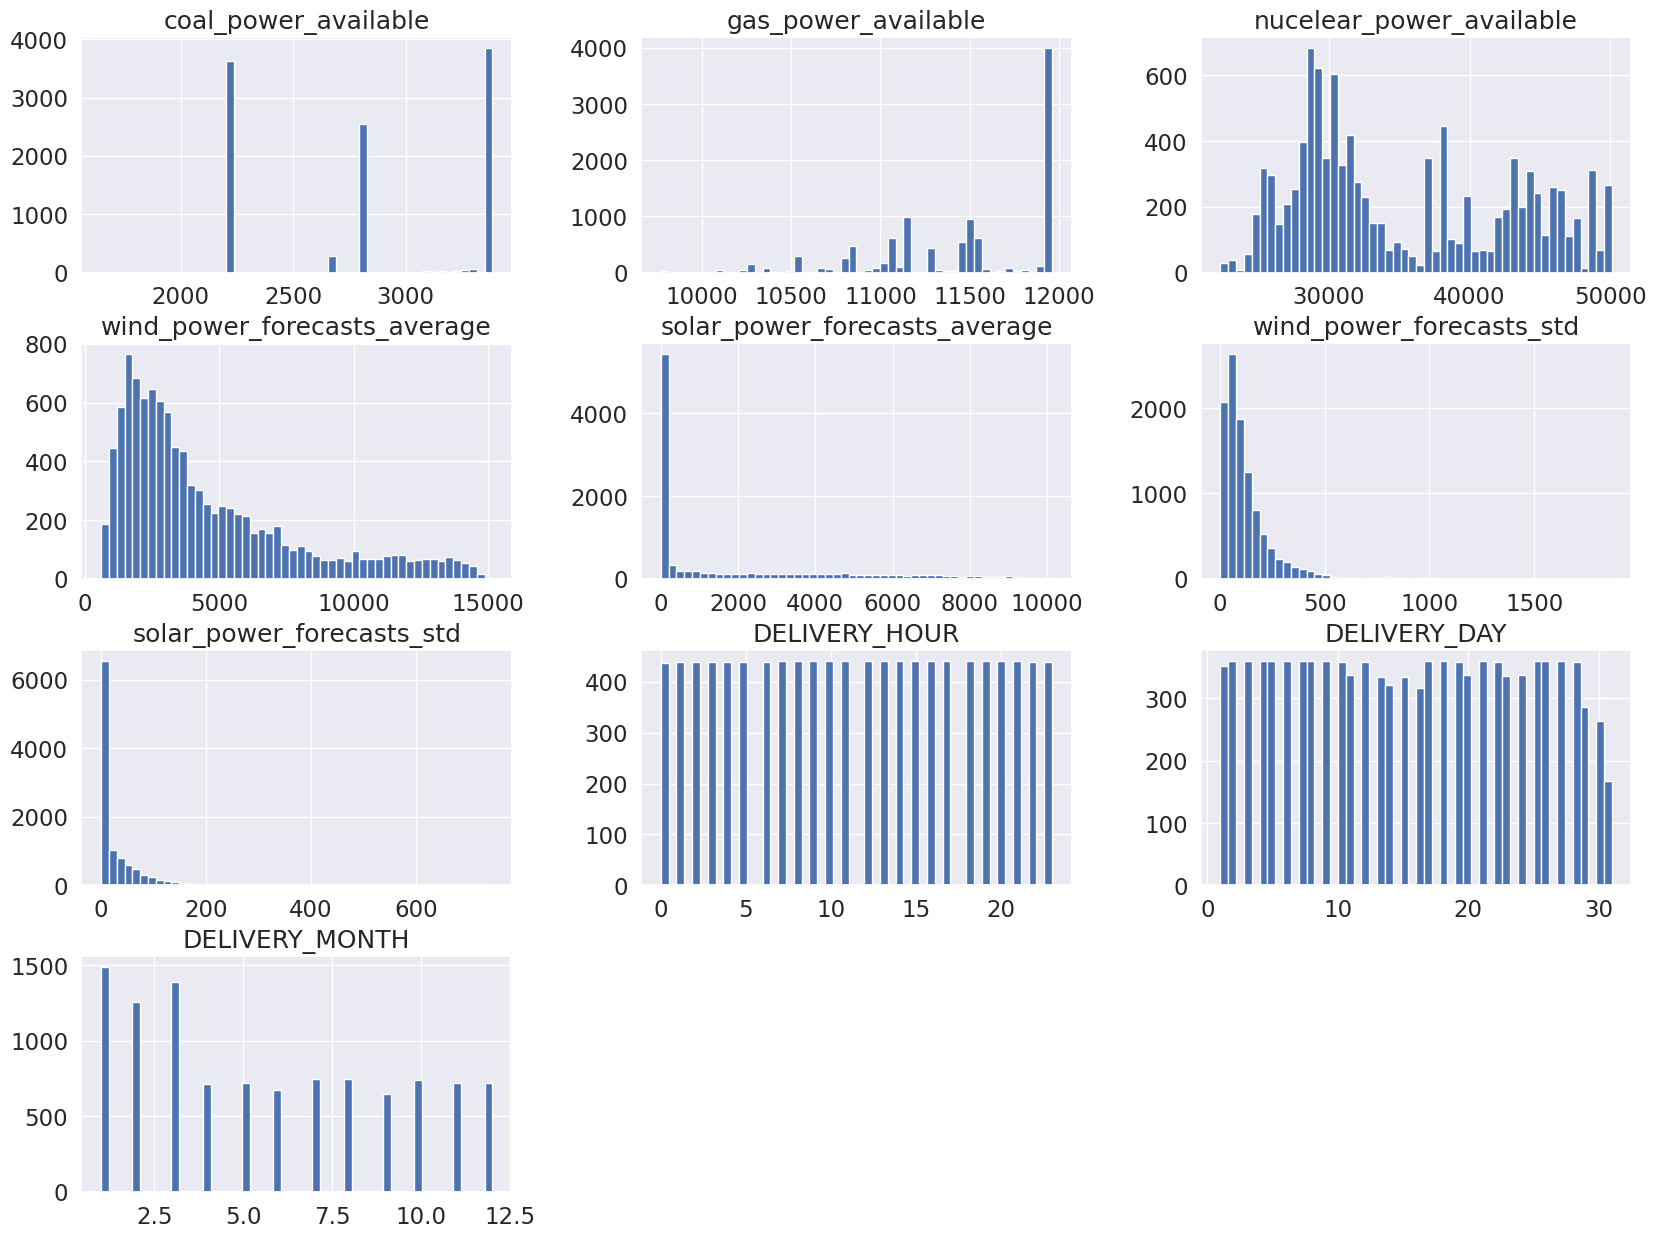

In [ ]:
X_train.hist(bins=50, figsize=(20,15))


array([[<Axes: title={'center': 'load_forecast'}>,
        <Axes: title={'center': 'coal_power_available'}>,
        <Axes: title={'center': 'gas_power_available'}>],
       [<Axes: title={'center': 'nucelear_power_available'}>,
        <Axes: title={'center': 'wind_power_forecasts_average'}>,
        <Axes: title={'center': 'solar_power_forecasts_average'}>],
       [<Axes: title={'center': 'wind_power_forecasts_std'}>,
        <Axes: title={'center': 'solar_power_forecasts_std'}>,
        <Axes: title={'center': 'DELIVERY_HOUR'}>],
       [<Axes: title={'center': 'DELIVERY_DAY'}>,
        <Axes: title={'center': 'DELIVERY_MONTH'}>, <Axes: >]],
      dtype=object)

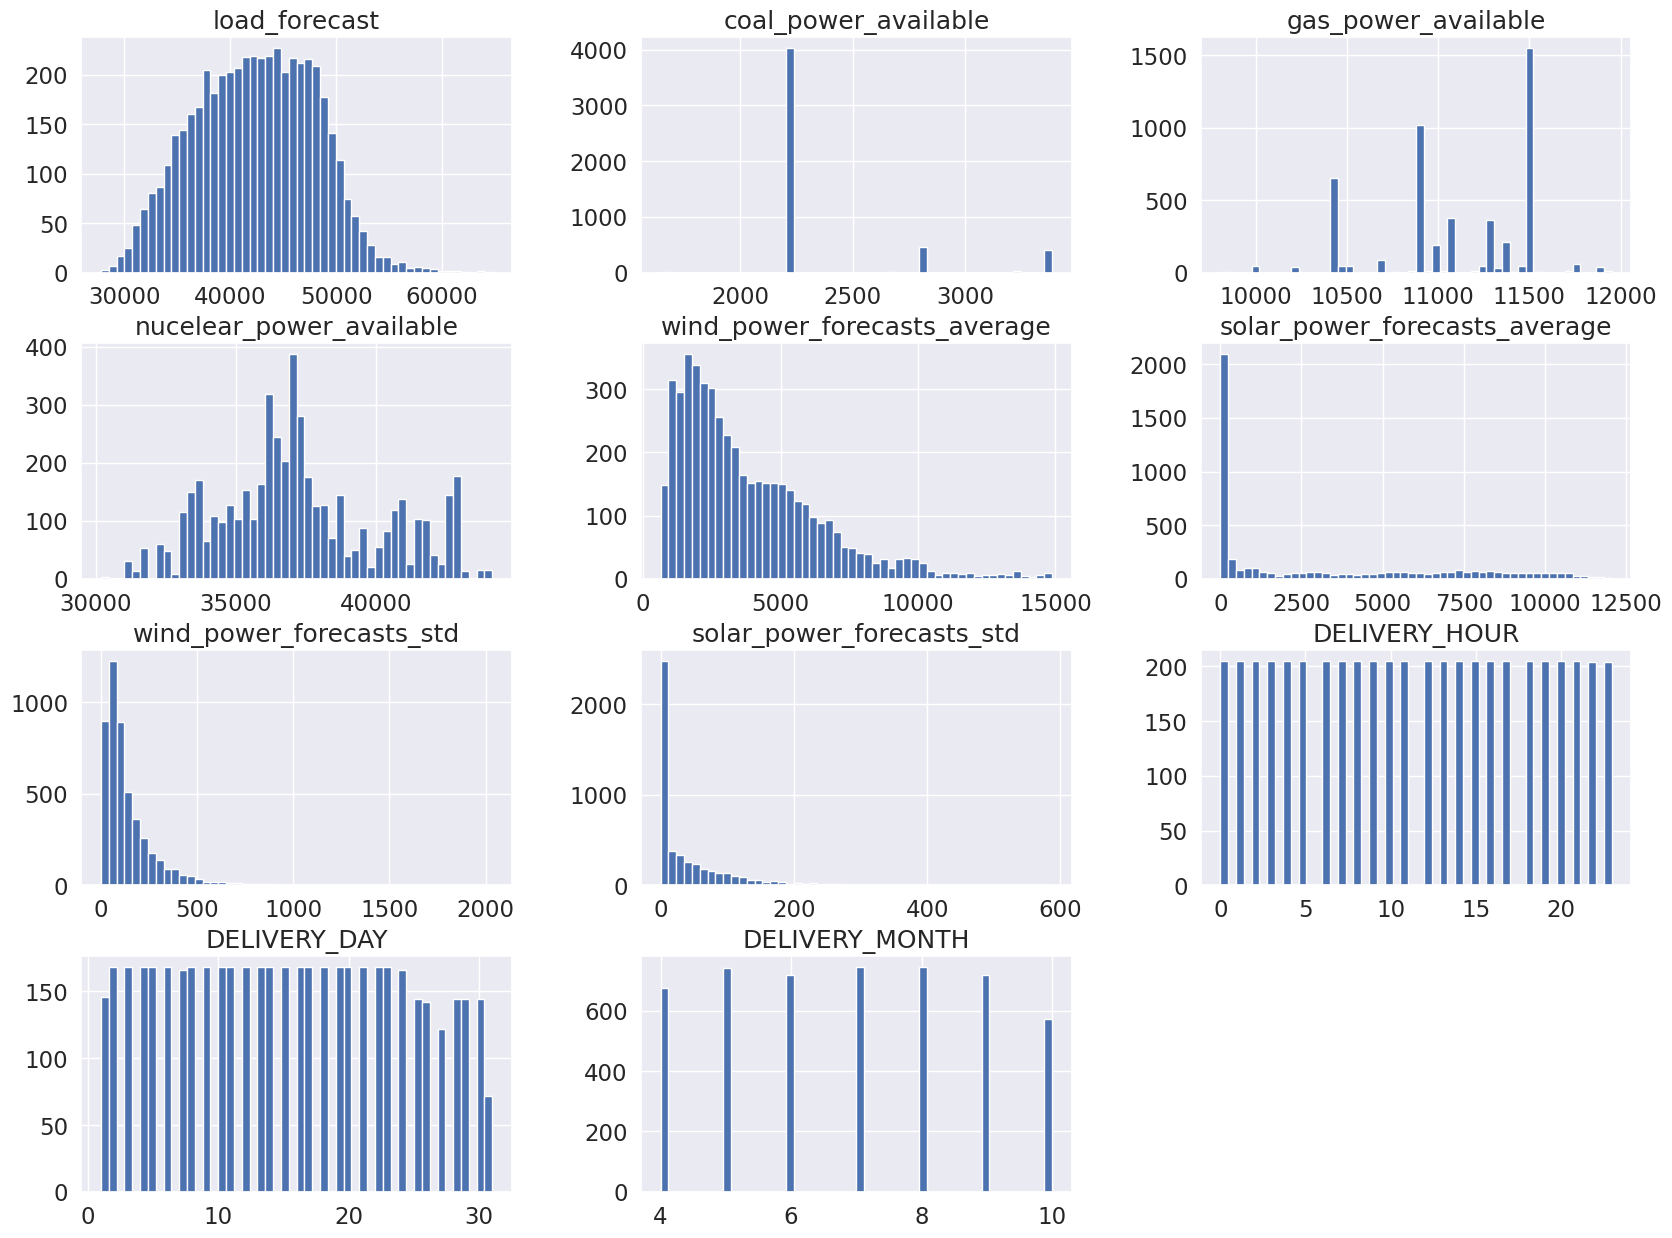

In [ ]:
X_test.hist(bins=50, figsize=(20,15))


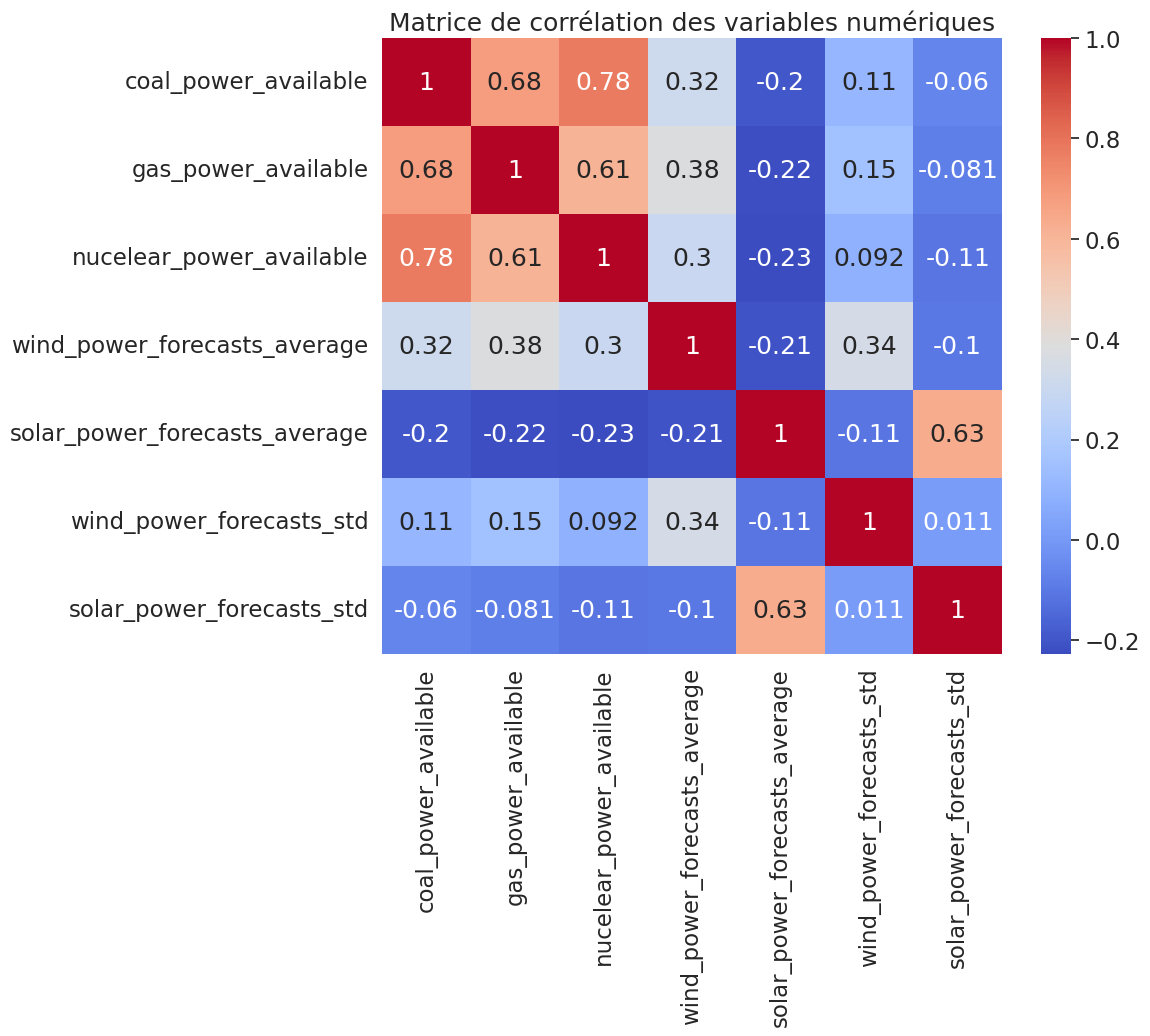

In [ ]:


# Filtrer les colonnes numériques uniquement
X_train = X_train.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = X_train.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si besoin
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()


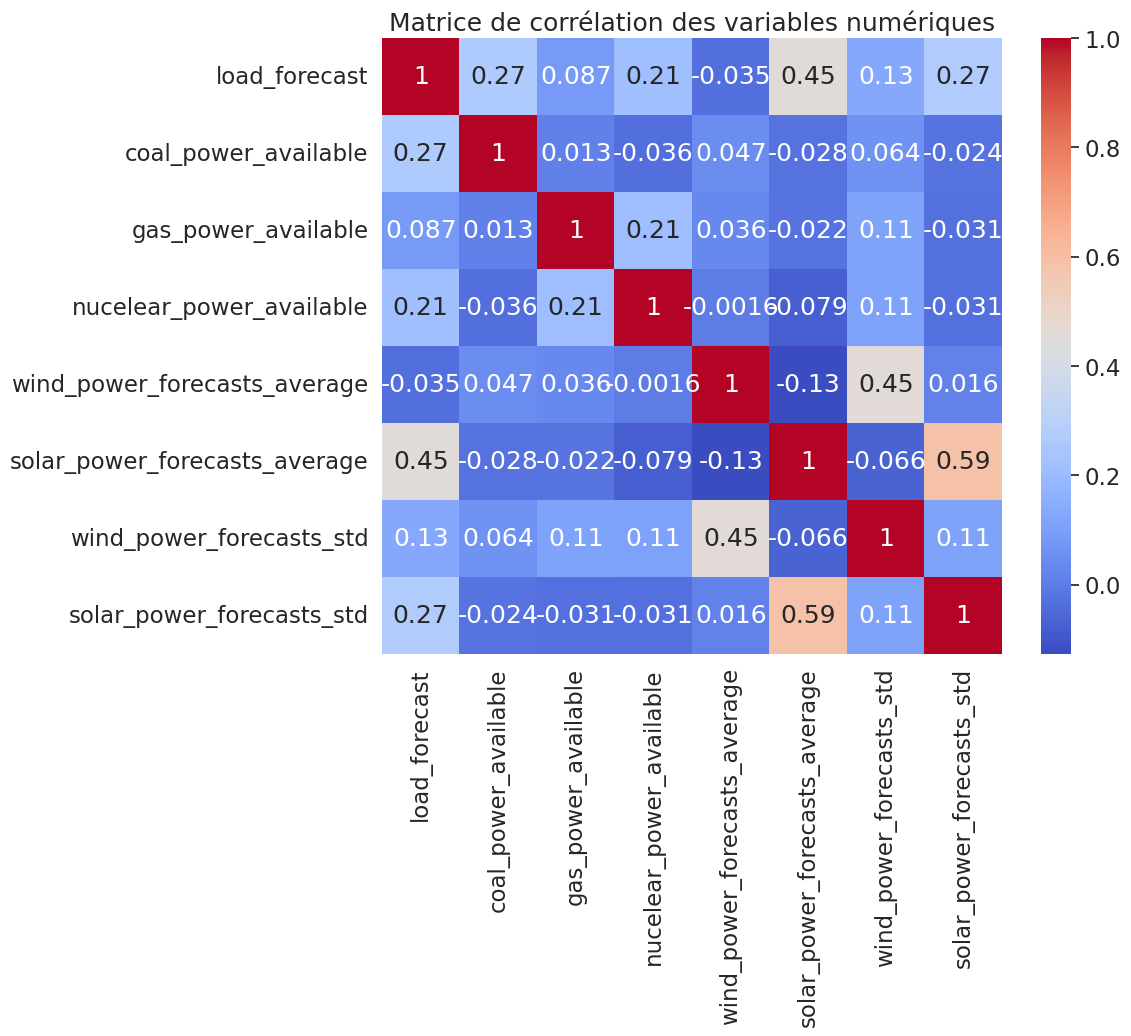

In [ ]:
# Filtrer les colonnes numériques uniquement
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix1 = X_test.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si besoin
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

In [ ]:
print("Colonnes de X_train :")
print(X_train.columns)

print("\nColonnes de X_test :")
print(X_test.columns)

# Vérifier les colonnes manquantes ou supplémentaires
missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)

print(f"\nColonnes manquantes dans X_test : {missing_in_test}")
print(f"Colonnes manquantes dans X_train : {missing_in_train}")


Colonnes de X_train :
Index(['coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std'],
      dtype='object')

Colonnes de X_test :
Index(['load_forecast', 'coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std'],
      dtype='object')

Colonnes manquantes dans X_test : set()
Colonnes manquantes dans X_train : {'load_forecast'}


In [ ]:
# Si x_train avait été nettoyé avant la normalisation
y_train = y_train.loc[X_train.index]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

print(X_train.head())

   coal_power_available  gas_power_available  nucelear_power_available  \
0              1.144557             0.053682                  1.148112   
1              1.144557             0.053682                  1.148112   
2              1.144557             0.053682                  1.148112   
3              1.144557             0.053682                  1.148112   
4              1.144557             0.053682                  1.148112   

   wind_power_forecasts_average  solar_power_forecasts_average  \
0                     -0.442725                       -0.70968   
1                     -0.410497                       -0.70968   
2                     -0.367228                       -0.70968   
3                     -0.319781                       -0.70968   
4                     -0.250551                       -0.70968   

   wind_power_forecasts_std  solar_power_forecasts_std  
0                 -0.350163                  -0.580714  
1                 -0.482267                 

In [ ]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)


In [ ]:
print(X_train.value_counts())

coal_power_available  gas_power_available  nucelear_power_available  wind_power_forecasts_average  solar_power_forecasts_average  wind_power_forecasts_std  solar_power_forecasts_std
-2.373049             1.000392              1.061810                 -0.702937                     -0.709680                      -0.709389                 -0.580714                    1
 1.144557             0.053682              1.187198                  0.233764                     -0.709680                       1.541628                 -0.580714                    1
                                                                      1.003058                     -0.709680                       0.846515                 -0.580714                    1
                                                                      1.143608                     -0.709680                       0.386317                 -0.580714                    1
                                                                      

In [ ]:
y_train = (y_train > 0).astype(int)
#1 indique que spot_id_delta est positif.
#0 indique que spot_id_delta est négatif ou nul.

In [ ]:
y_train.head()

,spot_id_delta,DELIVERY_HOUR,DELIVERY_DAYOFWEEK,DELIVERY_MONTH
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,1,1,1,1
4,1,1,1,1


In [ ]:
# Si y_train est un DataFrame, sélectionner la colonne cible
if isinstance(y_train, pd.DataFrame):
    y_train = y_train['spot_id_delta']  # Remplacez 'target_column' par le nom de la colonne cible


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Exemple de validation croisée
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Weighted Accuracy comme métrique personnalisée
def weighted_accuracy(y_true, y_pred):
    weights = abs(y_true)
    correct = (y_true == y_pred) * weights
    return correct.sum() / weights.sum()

weighted_accuracy_scorer = make_scorer(weighted_accuracy, greater_is_better=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True)
}

# Évaluer les modèles
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=weighted_accuracy_scorer)
    results[name] = scores.mean()

# Afficher les performances
for model, score in results.items():
    print(f"{model}: Weighted Accuracy = {score:.4f}")


[LightGBM] [Info] Number of positive: 4242, number of negative: 4202
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502369 -> initscore=0.009474
[LightGBM] [Info] Start training from score 0.009474
[LightGBM] [Info] Number of positive: 4243, number of negative: 4202
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 8445, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502427 -> initscore=0.009710
[LightGBM] [I

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]  # Seulement pour les noyaux non-linéaires
}

# Initialiser le modèle SVM
svm = SVC(probability=True)

# Lancer la recherche en grille
grid_search_svm = GridSearchCV(svm, param_grid, cv=StratifiedKFold(n_splits=5), scoring=weighted_accuracy_scorer)
grid_search_svm.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best Weighted Accuracy for SVM:", grid_search_svm.best_score_)


Best parameters for SVM: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Weighted Accuracy for SVM: 0.9632418686536376


In [ ]:
# Meilleur modèle SVM
best_svm = grid_search_svm.best_estimator_




















































































































































































# Prédictions sur le jeu de test
y_test_pred_svm = best_svm.predict(X_test)

# Calcul de la Weighted Accuracy pour SVM
test_weighted_accuracy_svm = weighted_accuracy(y_test, y_test_pred_svm)
print(f"Weighted Accuracy on test set (SVM): {test_weighted_accuracy_svm:.4f}")


In [ ]:

# Ajouter les résultats de SVM
results["SVM (Best Parameters)"] = grid_search_svm.best_score_

# Visualiser les performances
plt.bar(results.keys(), results.values())
plt.ylabel('Weighted Accuracy')
plt.title('Comparaison des modèles')
plt.xticks(rotation=45)
plt.show()
